In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.cluster.hierarchy as sch

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, accuracy_score,confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score  #model evaluation
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.calibration import calibration_curve
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

from PIL import Image

%matplotlib inline


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)
rich = pd.read_csv("/content/drive/MyDrive/392Data/activities.csv")
rich.head(10)

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Private Note,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Positive Grade,Average Negative Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Max Watts,Average Watts,Calories,Max Temperature,Average Temperature,Relative Effort.1,Total Work,Number of Runs,Uphill Time,Downhill Time,Other Time,Perceived Exertion,Type,Start Time,Weighted Average Power,Power Count,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,Total Weight Lifted,From Upload,Grade Adjusted Distance,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,Jump Count,Total Grit,Average Flow,Flagged,Average Elapsed Speed,Dirt Distance,Newly Explored Distance,Newly Explored Dirt Distance,Activity Count,Total Steps,Carbon Saved,Pool Length,Training Load,Intensity,Average Grade Adjusted Pace,Media
0,631360,"May 12, 2011, 6:25:37 PM",Cycletrons - Del Valle,Ride,NaN,5269,33.20,NaN,NaN,False,NaN,1994 Diamond Back Interval,activities/768129.tcx.gz,74.842697,12.24700,5269.0,4688.0,33206.300781,17.540701,NaN,424.470001,NaN,183.779999,418.829987,8.68976,0.001325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.354996,697.062561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18777.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,631361,"May 27, 2011, 6:26:04 PM",Cycletrons - Reverse Carneal Loop,Ride,NaN,5499,41.27,NaN,NaN,False,NaN,1994 Diamond Back Interval,activities/768128.tcx.gz,74.842697,12.24700,5499.0,5090.0,41273.398438,14.982300,NaN,189.804001,NaN,156.089996,264.429993,8.42185,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.304001,756.546875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18777.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,631362,"Apr 15, 2011, 6:23:51 PM",Cycletrons - Reverse Carneal Loop,Ride,NaN,5633,41.20,NaN,NaN,False,NaN,1994 Diamond Back Interval,activities/768131.tcx.gz,74.842697,12.24700,5633.0,4989.0,41208.199219,15.204800,NaN,164.807999,NaN,156.139999,265.119995,5.67443,-0.001262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.671997,882.650269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18777.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,631363,"Apr 1, 2011, 6:37:18 PM",Cycletrons - Reverse Carneal Loop,Ride,NaN,4963,40.08,NaN,NaN,False,NaN,1994 Diamond Back Interval,activities/768133.tcx.gz,74.842697,12.24700,4963.0,4963.0,40087.101562,14.157800,NaN,173.953995,NaN,157.029999,264.519989,7.35139,0.000374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.753998,684.823059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18777.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,631365,"Mar 24, 2011, 12:58:38 AM",Del Valle,Ride,NaN,4670,28.00,NaN,NaN,False,NaN,1994 Diamond Back Interval,activities/768137.tcx.gz,74.842697,12.24700,4670.0,4179.0,28004.400391,15.959700,NaN,277.265991,NaN,176.860001,418.869995,9.97295,0.001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.809006,609.515625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
print(rich.shape)

(5393, 92)


In [ ]:
ride_data = rich[rich['Activity Type'] == "Ride"]
print(ride_data.shape)

(5218, 92)


In [ ]:
ride_data.dropna(subset=["Max Heart Rate", "Elapsed Time", "Distance", "Bike Weight", "Average Heart Rate", "Elevation Gain", "Average Watts", "Average Cadence"], inplace=True)
ride_data.reset_index(drop=True, inplace=True)

In [ ]:
ride_data.shape

(1191, 92)

Q1(Supervised): Are we able to develop a model that replicates the data ‘relative effort’ (with 90%R2)  to understand how this value is predicted, and be able to predict it for future activities?


In [ ]:
effort_predictors =["Max Heart Rate", "Elapsed Time", "Distance", "Bike Weight", "Average Heart Rate", "Elevation Gain", "Average Watts" , "Average Cadence"]

In [ ]:
X = ride_data[effort_predictors]
y = ride_data["Relative Effort.1"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#Linear Regression
z = make_column_transformer((StandardScaler(), effort_predictors),
                            remainder = "passthrough")


lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess
#train
print("Train:")
print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_absolute_percentage_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))


#test
print("\nTest:")
print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))

Train:
MSE :  179.80734783806153
MAE :  9.978256094596805
MAPE:  98087508317044.73
R2  :  0.8375621734539909

Test:
MSE :  223.06690235580382
MAE :  10.617165001355392
MAPE:  0.6913853910019152
R2  :  0.8114558399857622


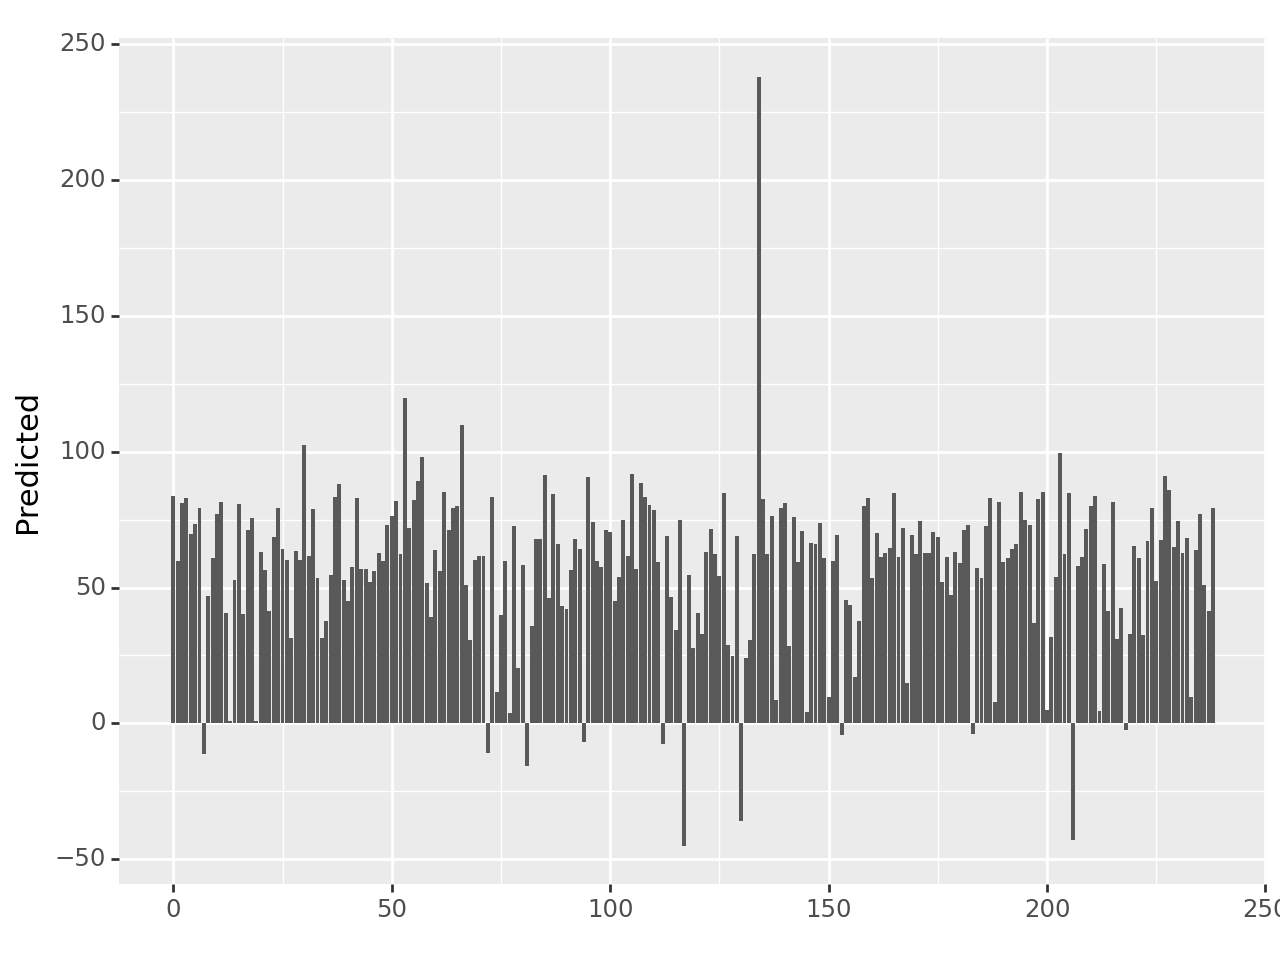

<Figure Size: (640 x 480)>

In [ ]:
#bar graph comparing predicted to actual relative effort values
# Combine actual and predicted values into a DataFrame
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
test_results.reset_index(drop=True, inplace=True)

(ggplot(test_results,aes(x = test_results.index, y = 'Predicted'))+
 geom_bar(stat = 'identity')
 )




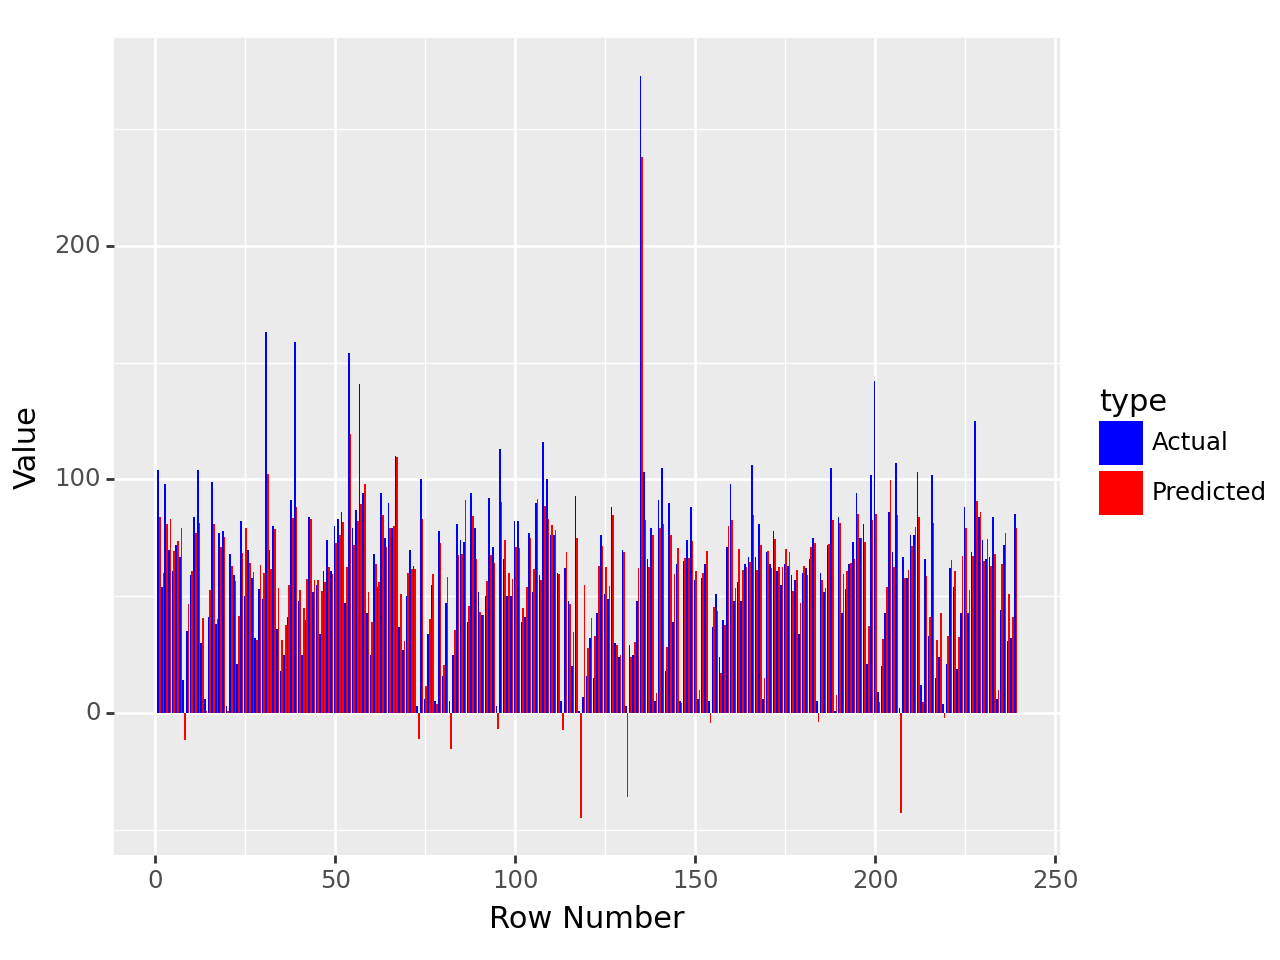

<Figure Size: (640 x 480)>

In [ ]:
df = test_results.reset_index().melt(id_vars='index', var_name='type', value_name='value')

# Plot using ggplot with geom_bar
(ggplot(df, aes(x='index + 1', y='value', fill='type')) +
 geom_bar(stat='identity', position='dodge') +
 labs(x='Row Number', y='Value') +
 scale_fill_manual(values=["blue", "red"]))


    Category      Count
0  Predicted  60.542562
1     Actual  62.325000


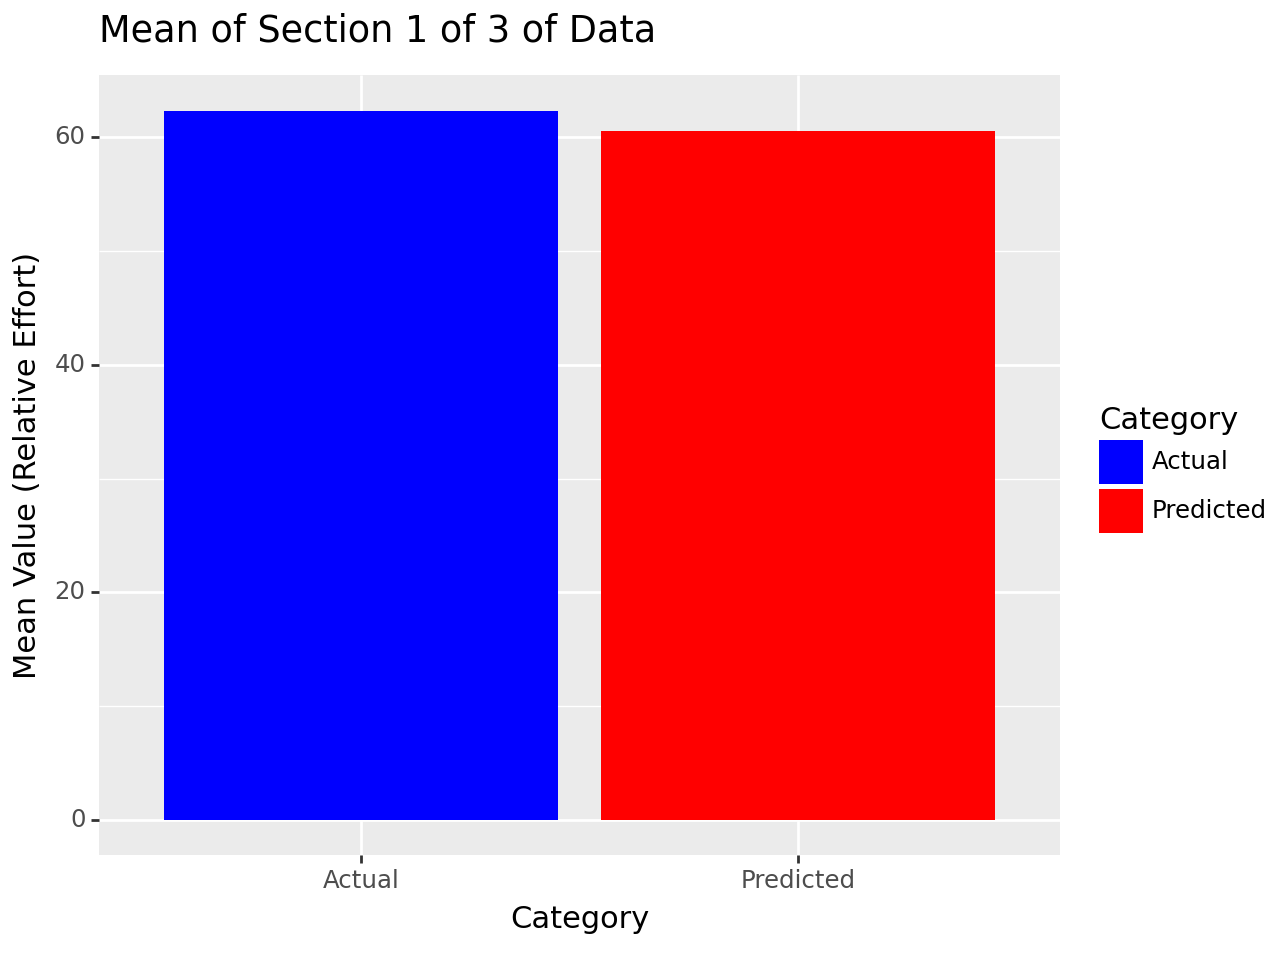


    Category      Count
0  Predicted  54.330176
1     Actual  56.062500


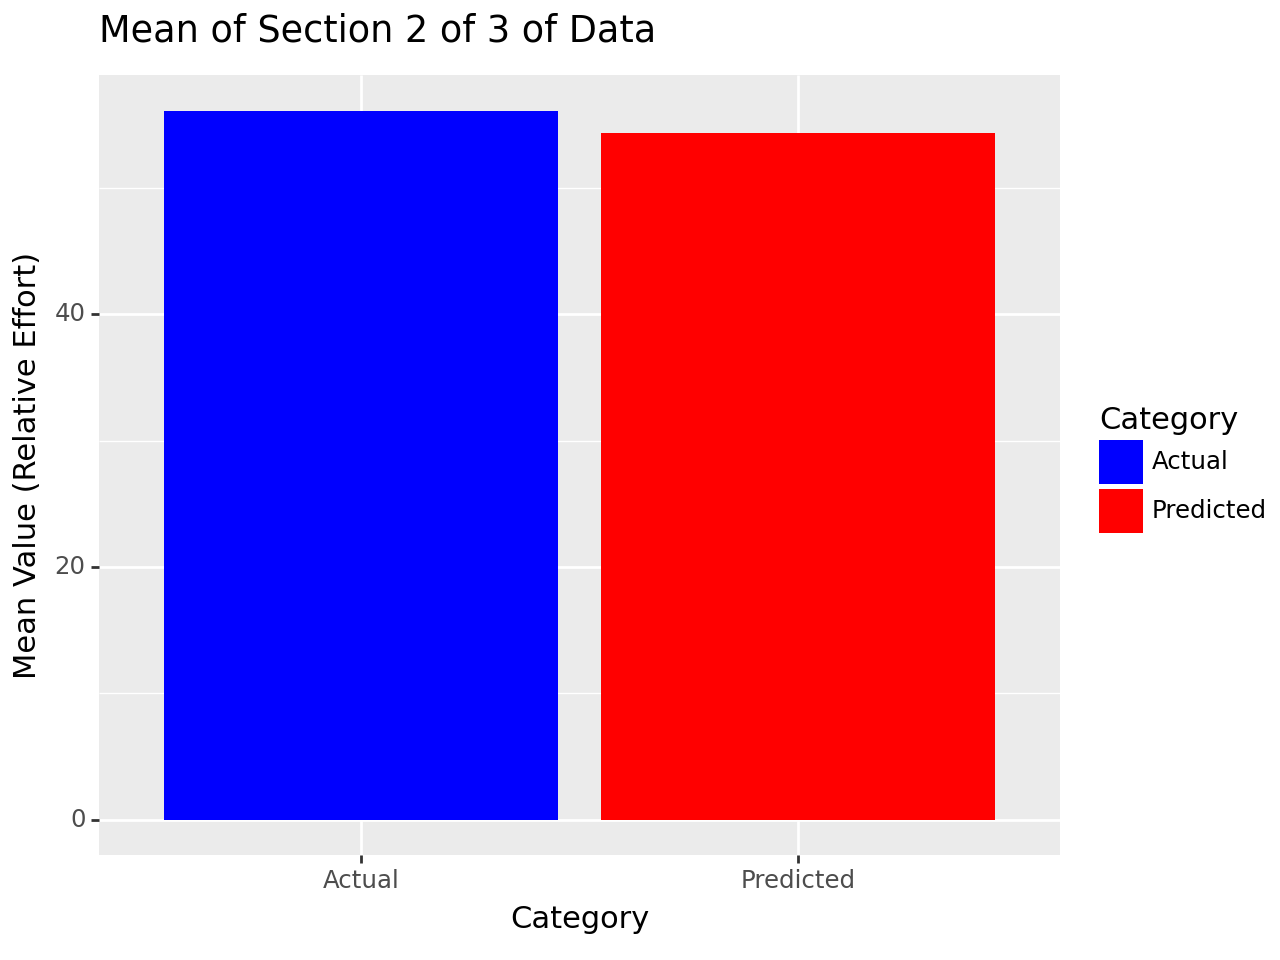


    Category      Count
0  Predicted  58.734564
1     Actual  59.525000


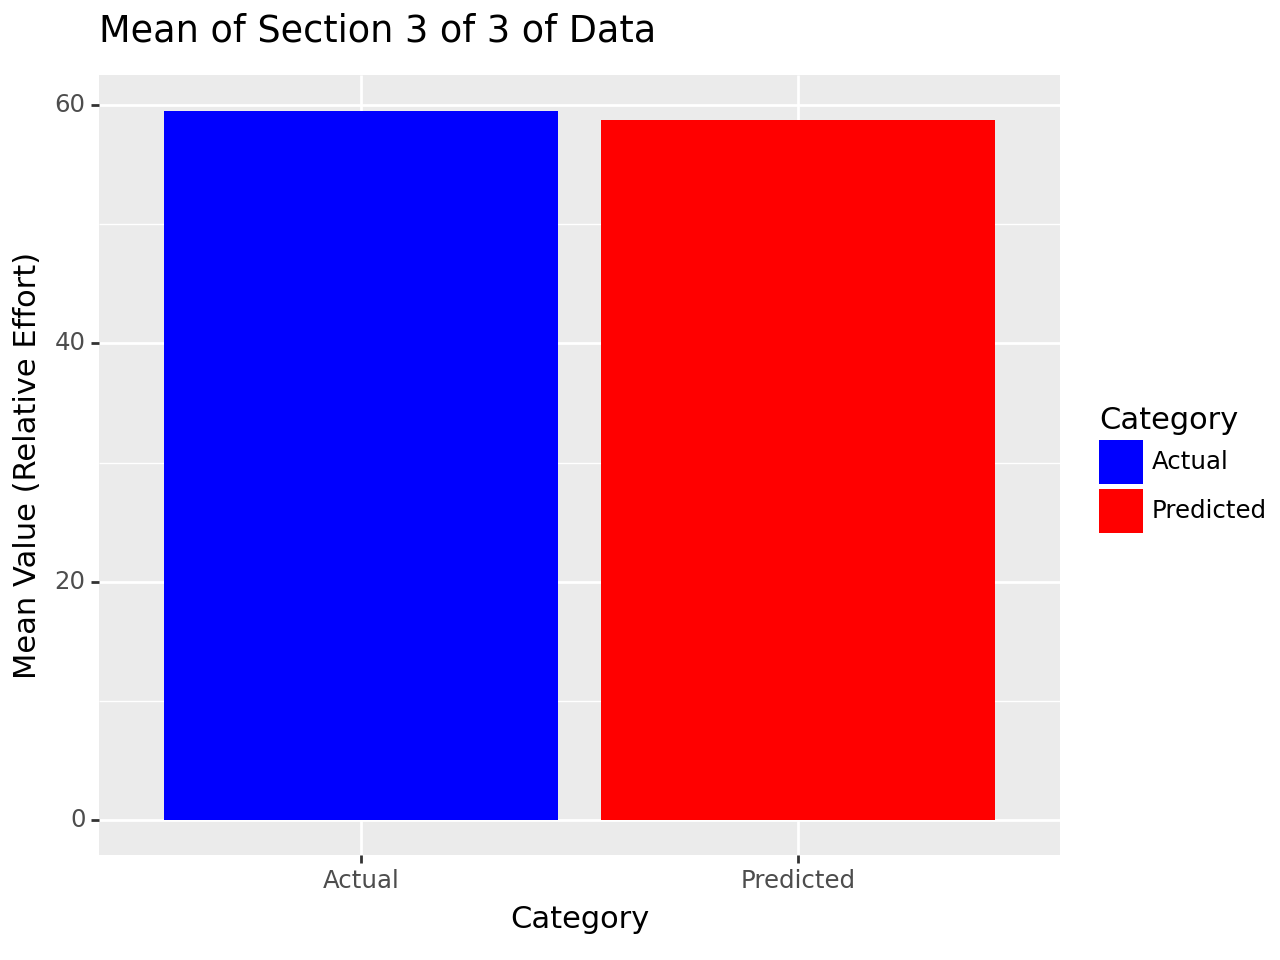

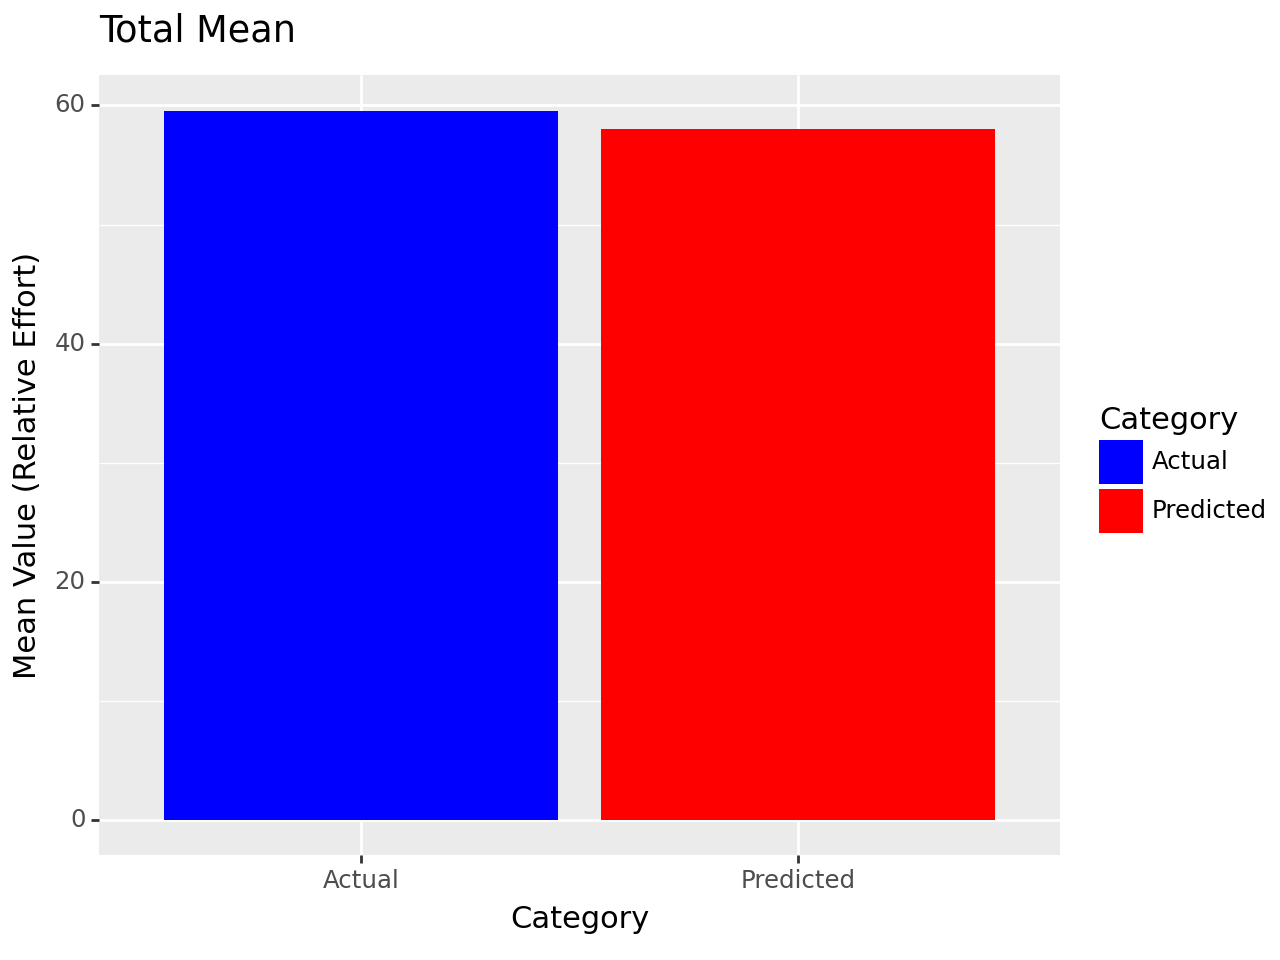

In [ ]:
index = 1
for i in range(0, len(test_results)-2,len(test_results)//3):
  test_results_portion = test_results.loc[i:i+len(test_results)//3]
  pred_mean = test_results_portion['Predicted'].mean()
  actual_mean = test_results_portion['Actual'].mean()
  mean_bar_df = pd.DataFrame({
    'Category': ['Predicted', 'Actual'],
    'Count': [pred_mean, actual_mean]
})
  print(mean_bar_df.head())
  print(ggplot(mean_bar_df, aes(x='Category', y='Count', fill='Category')) +
          geom_bar(stat='identity', position='dodge') +
          labs(x='Category', y='Mean Value (Relative Effort)', title = f"Mean of Section {index} of 3 of Data") +
          scale_fill_manual(values=["blue", "red"]))
  index += 1
total_pred_mean = test_results["Predicted"].mean()
total_mean = test_results["Actual"].mean()
total_mean_df = pd.DataFrame({
      'Category' :["Predicted", "Actual"],
      "Count" : [total_pred_mean, total_mean]
})
print(ggplot(total_mean_df, aes(x='Category', y='Count', fill='Category')) +
          geom_bar(stat='identity', position='dodge') +
          labs(x='Category', y='Mean Value (Relative Effort)', title = "Total Mean") +
          scale_fill_manual(values=["blue", "red"]))

Is LASSO or PCA a more accurate dimensionality reduction?

In [ ]:
#lasso reduction
X = ride_data[effort_predictors]
y = ride_data["Relative Effort.1"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#Linear Regression
z = make_column_transformer((StandardScaler(), effort_predictors),
                            remainder = "passthrough")


lr = LassoCV()

pipe = Pipeline([("zscore", z),
                ("lasso", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess
#train
print("Train:")
print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_absolute_percentage_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))


#test
print("\nTest:")
print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))


Train:
MSE :  175.34291088095603
MAE :  9.912809728845371
MAPE:  90996285404982.88
R2  :  0.8482899958088915

Test:
MSE :  242.02308116528272
MAE :  10.953961323276545
MAPE:  0.7664634324012405
R2  :  0.7486268004479479


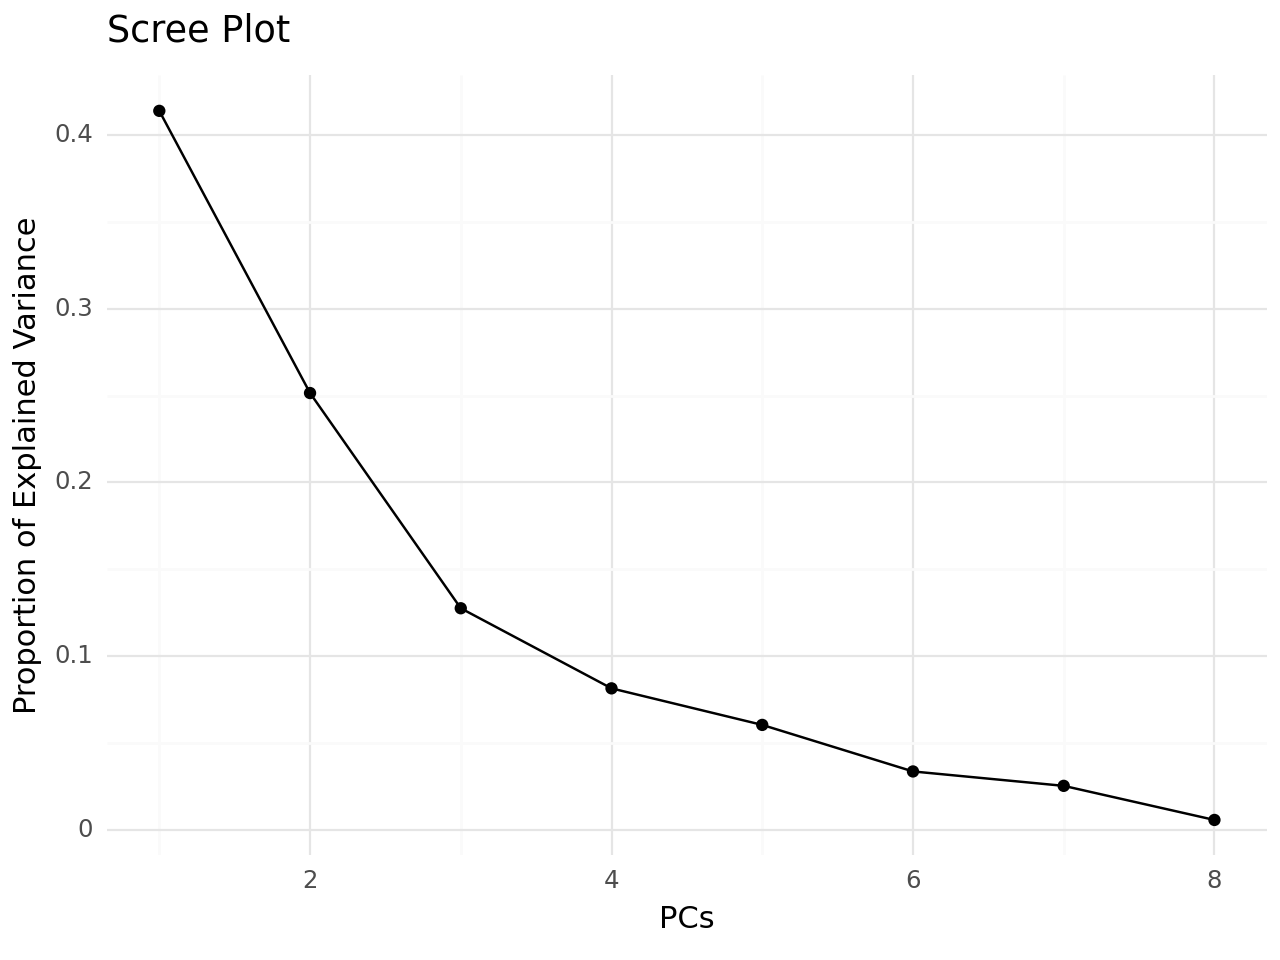

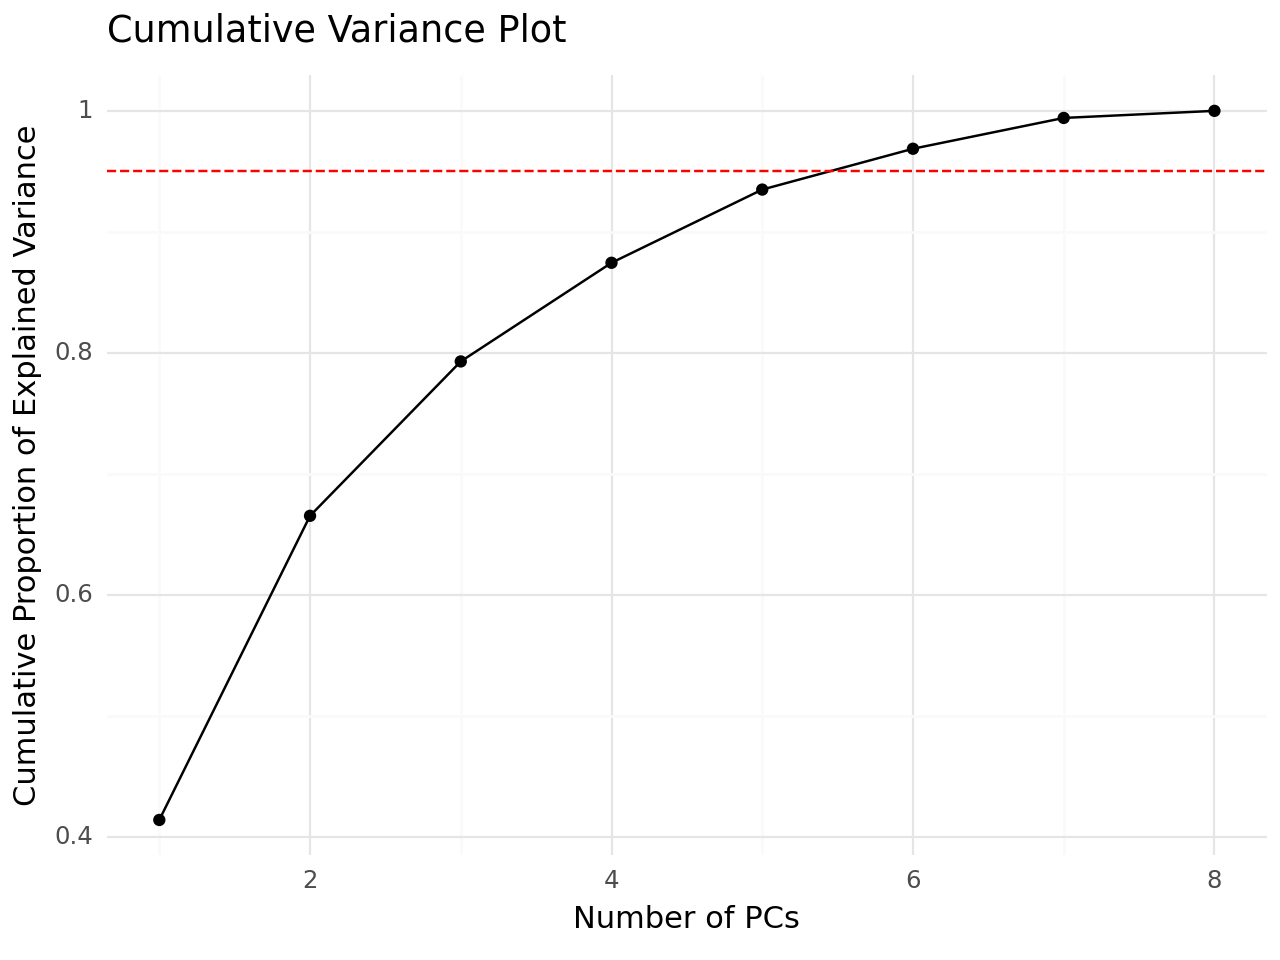

In [ ]:
#PCA reduction

X = ride_data[effort_predictors]
y = ride_data["Relative Effort.1"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)
#Linear Regression
z = make_column_transformer((StandardScaler(), effort_predictors),
                            remainder = "passthrough")


pca = PCA()

pipe_pca = Pipeline([("zscore", z),
                ("pca",pca)])

# fit
pipe_pca.fit(X_train)




# scree/cumvar plot
pcaDF = pd.DataFrame({"expl_var" :
                      pipe_pca.named_steps["pca"].explained_variance_ratio_,
                      "pc": range(1,9),
                      "cum_var":
                      pipe_pca.named_steps["pca"].explained_variance_ratio_.cumsum()})

print(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point() +
theme_minimal() + labs(x = "PCs", y = "Proportion of Explained Variance", title = "Scree Plot"))

print(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line() +
 geom_point() + geom_hline(yintercept = 0.95, color = "red", linetype = "dashed") +
 theme_minimal() + labs(x = "Number of PCs", y = "Cumulative Proportion of Explained Variance", title = "Cumulative Variance Plot"))

In [ ]:
# empty pipeline
z = make_column_transformer((StandardScaler(), effort_predictors),
                            remainder = "passthrough")

pca = PCA(n_components = 6)

pipe_lr = Pipeline([
    ("z", z),
    ("pca", pca),
    ("model", LinearRegression())
])

# fit
pipe_lr.fit(X_train,y_train)

y_pred_train = pipe_lr.predict(X_train)
y_pred_test  = pipe_lr.predict(X_test)

print("Train:")
print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_absolute_percentage_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))


#test
print("\nTest:")
print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))

Train:
MSE :  212.74269125169673
MAE :  11.043796435533595
MAPE:  260211135765512.44
R2  :  0.8156852430471957

Test:
MSE :  259.37959029018003
MAE :  12.340980595881591
MAPE:  0.7140441035977513
R2  :  0.739035222637975


Q3 (Logistic Regression): Question: Can we train a Logistic Regression Model to accurately predict (0.8 accuracy or higher) whether the given athlete’s bike ride was a commute or not.


In [ ]:
#Activity Date, Commute, Distance, Moving Time, Elapsed Time, Average Grade
commute_df = rich[rich[['Activity Date', "Commute" , 'Distance', 'Moving Time', 'Elapsed Time', 'Average Grade']].notnull().all(axis=1)]
commute_df = commute_df[commute_df['Activity Type'] == "Ride"]
commute_df['datetime'] = pd.to_datetime(commute_df['Activity Date'])
commute_df['hour'] = commute_df['datetime'].dt.hour
commute_df['day_of_week'] = commute_df['datetime'].dt.dayofweek

commute_predictors = ["Distance" , "Moving Time", "Elapsed Time", "Average Grade", "hour", "day_of_week"]
commute_cont_preds = ["Distance" , "Moving Time", "Elapsed Time", "Average Grade"]
commute_cat_preds = ["hour", "day_of_week"]


In [ ]:
X_com = commute_df[commute_predictors]
y_com = commute_df["Commute"]




y_com = y_com.astype(bool)



# Train Test Split
X_train_com, X_test_com, y_train_com, y_test_com = train_test_split(X_com,y_com, test_size = 0.2)

# Create Empty Model
pre_com = make_column_transformer((StandardScaler(),commute_cont_preds),
                              (OneHotEncoder(handle_unknown='ignore'), commute_cat_preds),
                              remainder = "passthrough")

lr_com = LogisticRegression()

pipe_com = Pipeline([
    ("pre", pre_com),
    ("logreg", lr_com)
])

# fit
pipe_com.fit(X_train_com, y_train_com)

# predict
y_pred_train_com = pipe_com.predict(X_train_com)
y_pred_test_com = pipe_com.predict(X_test_com)


y_pred_train_com_prob = pipe_com.predict_proba(X_train_com)[:,1]
y_pred_test_com_prob = pipe_com.predict_proba(X_test_com)[:,1]
# assess
print("Train Acc: ", accuracy_score(y_train_com, y_pred_train_com))
print("Test Acc: ", accuracy_score(y_test_com, y_pred_test_com))

print("Train ROC AUC   : ", roc_auc_score(y_train_com, y_pred_train_com_prob))
print("Test ROC AUC    : ", roc_auc_score(y_test_com, y_pred_test_com_prob))

Train Acc:  0.9731607955907021
Test Acc:  0.9626436781609196
Train ROC AUC   :  0.9896572644185314
Test ROC AUC    :  0.9786300134250713


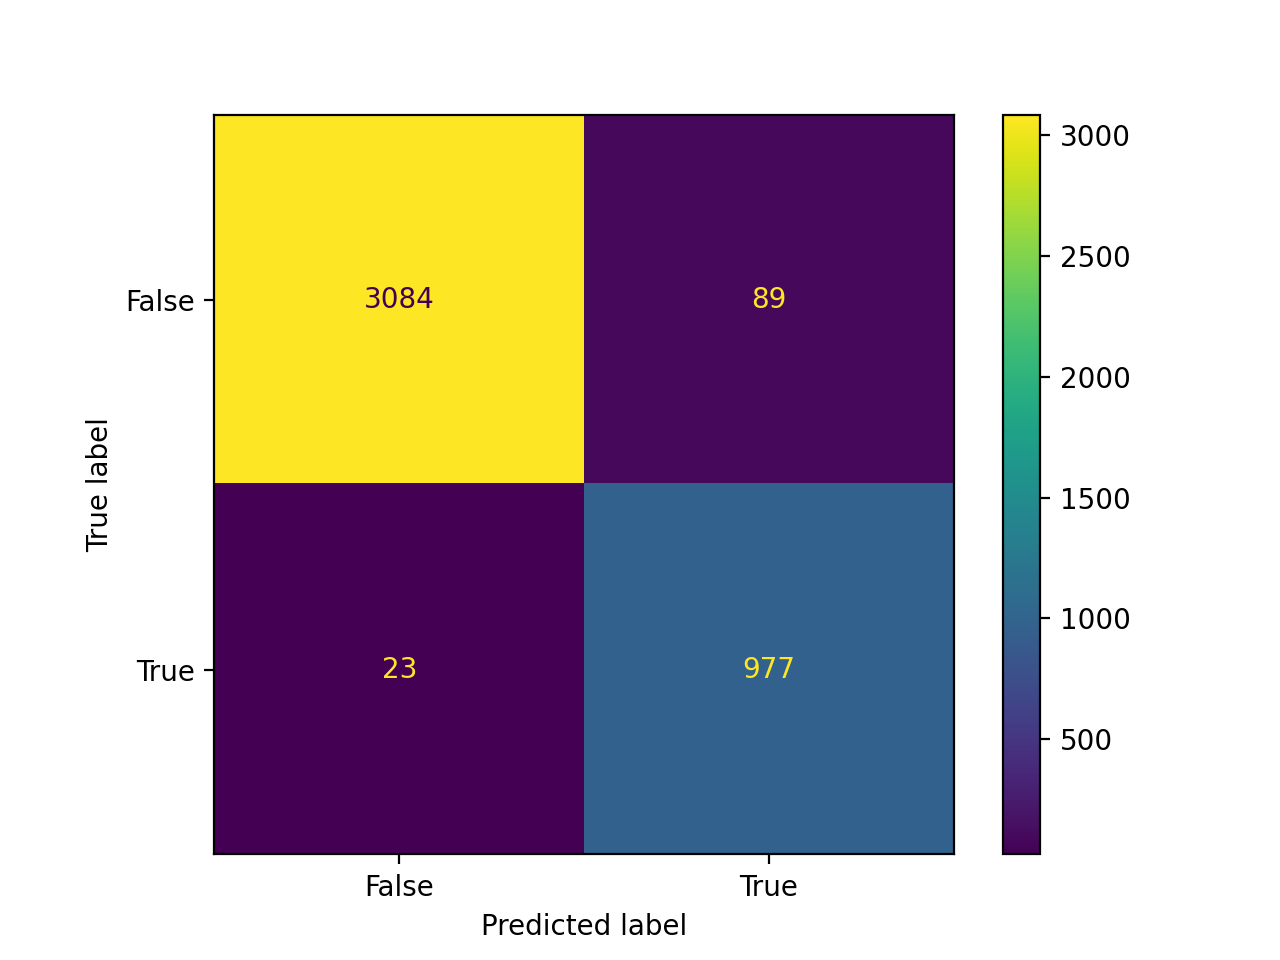

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train_com,y_pred_train_com)

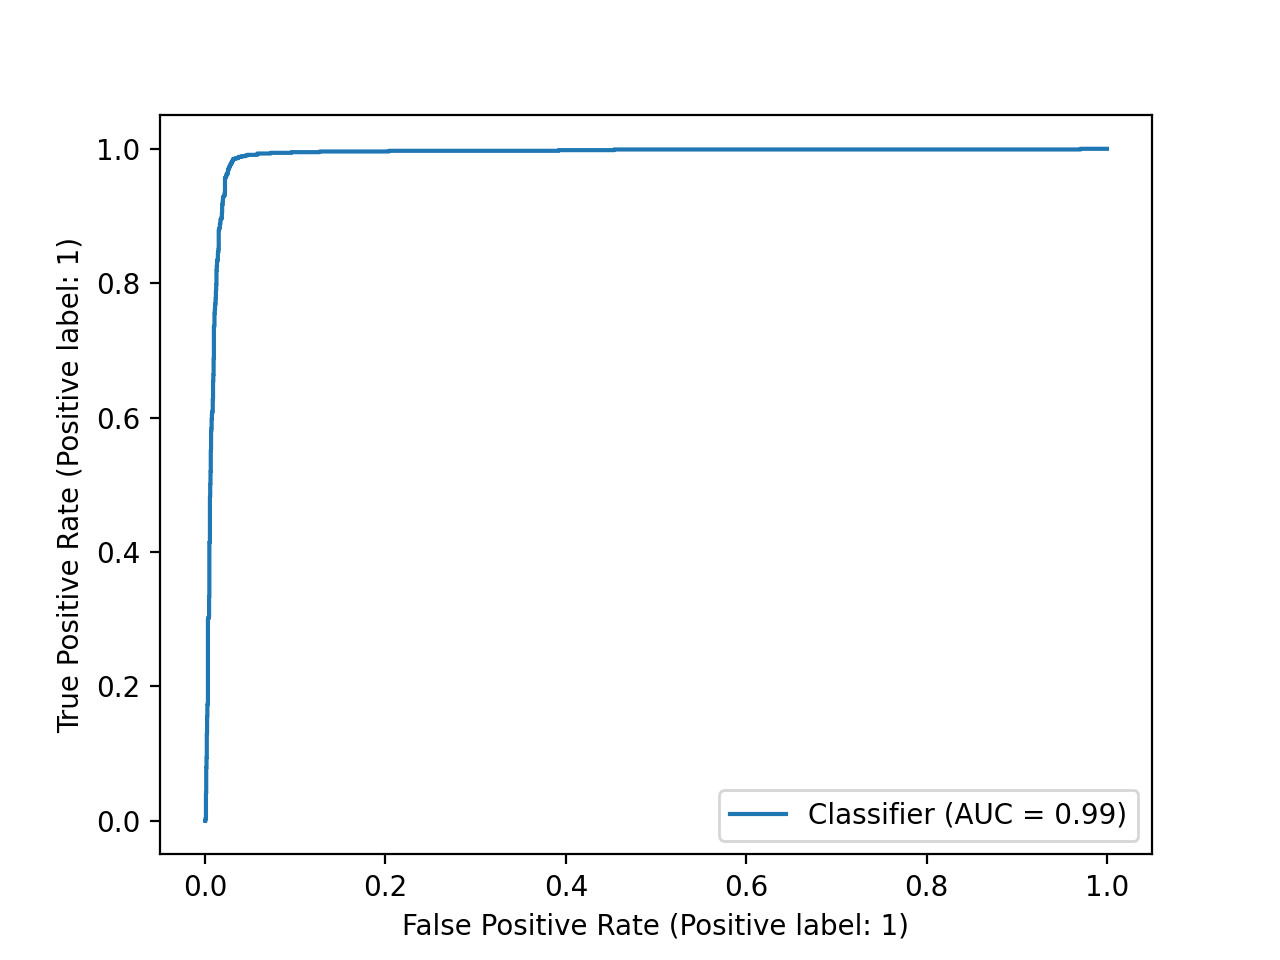

In [ ]:
RocCurveDisplay.from_predictions(y_train_com, y_pred_train_com_prob)

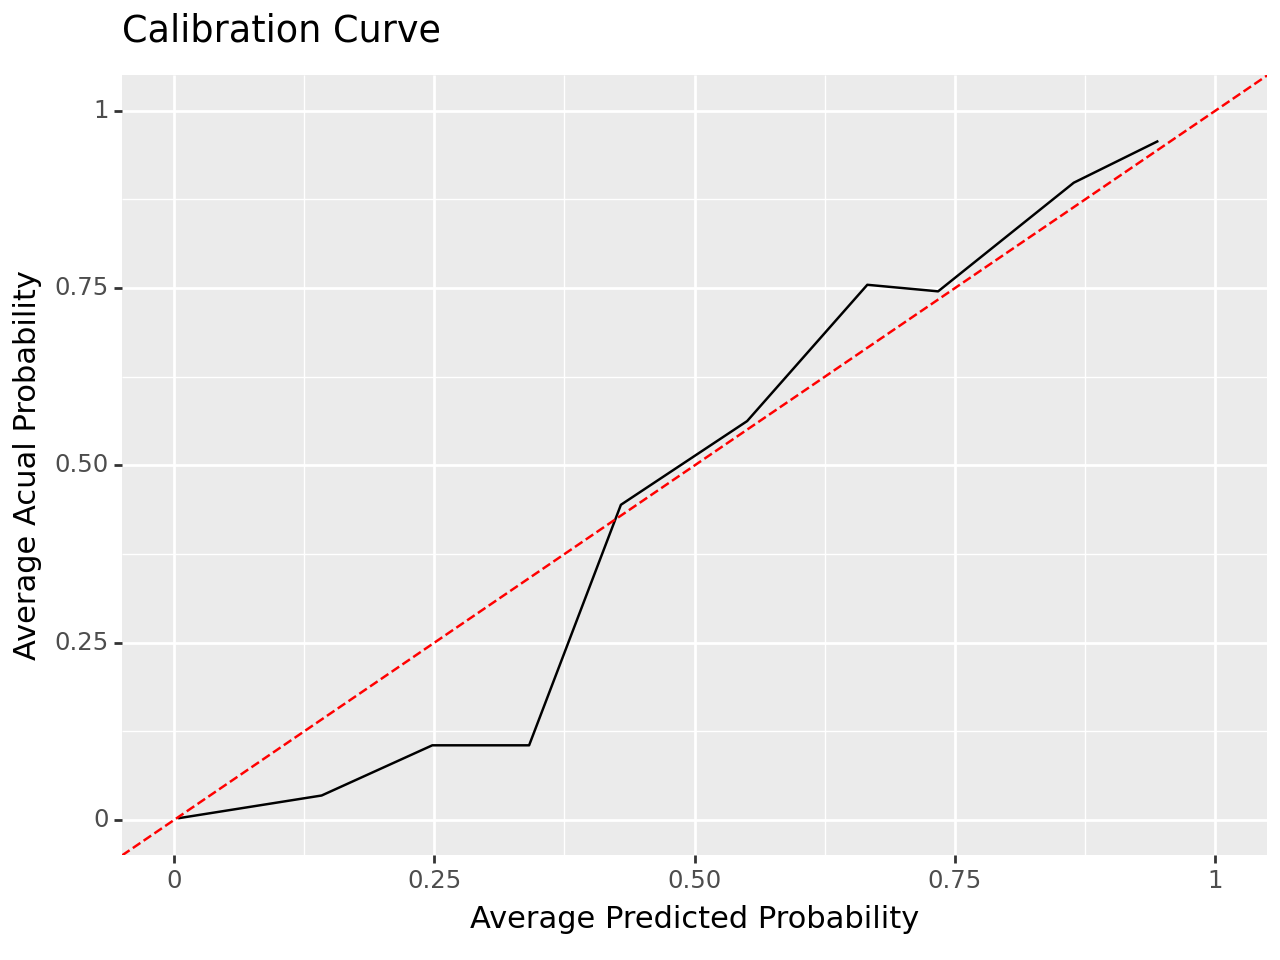

<Figure Size: (640 x 480)>

In [ ]:
# calibration
prob_true, prob_pred = calibration_curve(y_train_com, y_pred_train_com_prob,n_bins=10)

(ggplot() + geom_line(aes(x = prob_pred, y = prob_true))
+ geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
labs(x = "Average Predicted Probability",
     y = "Average Acual Probability",
     title = "Calibration Curve") +
ylim([0,1]) + xlim([0,1]))

In [ ]:
#clustering
ride_data["Moving Speed MPH"] = (ride_data['Distance'] * 0.621371) / (ride_data['Moving Time']/3600)
ride_data.head()


,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Private Note,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Positive Grade,Average Negative Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Max Watts,Average Watts,Calories,Max Temperature,Average Temperature,Relative Effort.1,Total Work,Number of Runs,Uphill Time,Downhill Time,Other Time,Perceived Exertion,Type,Start Time,Weighted Average Power,Power Count,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,Total Weight Lifted,From Upload,Grade Adjusted Distance,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,Jump Count,Total Grit,Average Flow,Flagged,Average Elapsed Speed,Dirt Distance,Newly Explored Distance,Newly Explored Dirt Distance,Activity Count,Total Steps,Carbon Saved,Pool Length,Training Load,Intensity,Average Grade Adjusted Pace,Media,Moving Speed MPH
0,635219,"May 26, 2011, 1:07:09 AM",Del Valle,Ride,NaN,5139,27.42,171.0,28.0,False,NaN,Scattante 330,activities/772567.fit.gz,74.842697,9.07185,5139.0,3914.0,27424.099609,17.344999,NaN,287.600006,NaN,148.399994,386.000000,32.786900,0.012398,NaN,NaN,120.0,74.792603,171.0,128.772995,NaN,120.158997,524.387085,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.671123
1,635222,"May 22, 2011, 2:08:24 PM",IC3 - Tuscany Loop,Ride,NaN,5906,45.09,179.0,58.0,False,NaN,Scattante 330,activities/772571.fit.gz,74.842697,10.43260,5906.0,5514.0,45097.398438,16.511999,NaN,298.600006,NaN,96.599998,185.800003,21.276600,0.003548,NaN,NaN,121.0,86.067398,179.0,141.718994,NaN,128.748001,791.556885,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.292243
2,635223,"May 20, 2011, 6:30:25 PM",Cycletrons - Reverse Carneal Loop,Ride,NaN,5379,41.36,112.0,16.0,False,NaN,Scattante 330,activities/772573.fit.gz,74.842697,9.07185,5379.0,5074.0,41364.500000,15.803300,NaN,225.800003,NaN,139.199997,256.600006,81.743896,0.083163,NaN,NaN,123.0,86.686600,112.0,109.978996,NaN,127.920998,723.714355,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.234067
3,635226,"May 15, 2011, 2:05:18 PM",IC3 - Collier Loop,Ride,NaN,7199,47.26,171.0,52.0,False,NaN,Scattante 330,activities/772575.fit.gz,74.842697,9.07185,7199.0,5927.0,47265.300781,14.736700,NaN,224.800003,NaN,108.599998,275.399994,65.789497,-0.003808,NaN,NaN,120.0,86.418602,171.0,139.365997,NaN,115.288002,761.892883,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.836608
4,635229,"May 13, 2011, 6:30:31 PM",Cycletrons - Reverse Carneal Loop,Ride,NaN,5214,41.33,198.0,65.0,False,NaN,Scattante 330,activities/772578.fit.gz,74.842697,9.07185,5214.0,4907.0,41335.800781,16.426701,NaN,202.000000,NaN,155.199997,260.399994,70.796501,0.020805,NaN,NaN,124.0,85.887001,198.0,152.087997,NaN,135.024994,738.762939,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
print(ride_data[["Moving Speed MPH", "Calories", "Elapsed Time", "Moving Time", "Max Heart Rate", "Average Heart Rate","Average Watts", "Average Cadence", "Elevation Gain", "Max Grade", "Distance"]].notnull().all(axis=1).sum())

1191


Q4 (clustering): Could we find certain classes of activities (hard, easy, long day) based on performance statistics?

In [ ]:
cluster_predictors = ["Moving Speed MPH", "Calories", "Elapsed Time", "Moving Time", "Max Heart Rate", "Average Watts", "Average Cadence", "Elevation Gain", "Max Grade", "Distance"]

clust_X = ride_data[cluster_predictors]

z = make_column_transformer((StandardScaler(), cluster_predictors), remainder = "passthrough")

km = KMeans(n_clusters = 3)
km_pipe = Pipeline([("z", z), ("clust", km)])


labels = km_pipe.fit_predict(clust_X)



print(silhouette_score(clust_X, km_pipe.predict(clust_X)))

0.4628267824736487


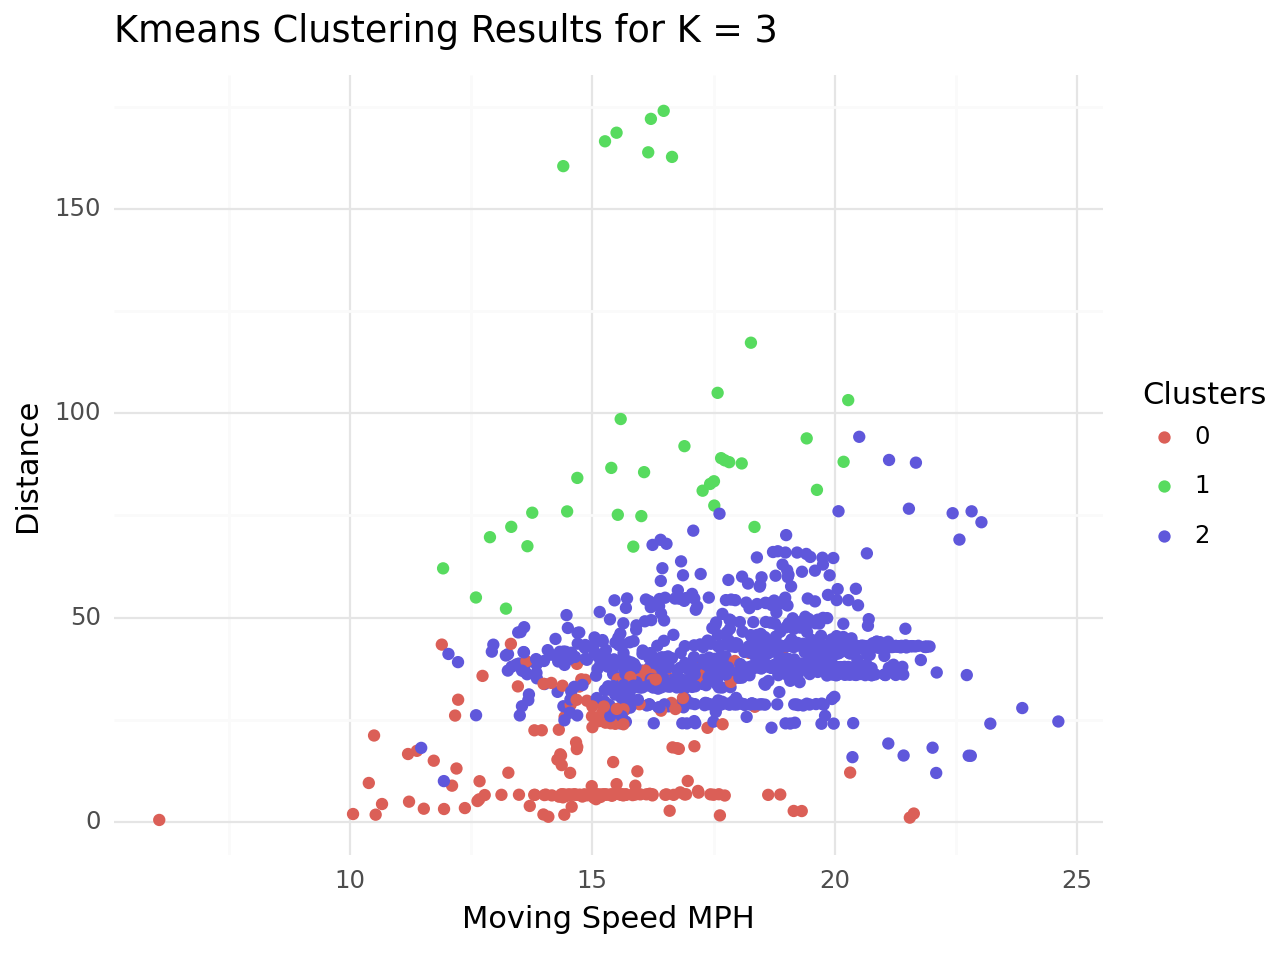

In [ ]:
print(ggplot(clust_X, aes(x = "Moving Speed MPH", y = "Distance", color = "factor(labels)" )) +
geom_point() + theme_minimal() +
labs(x = "Moving Speed MPH", y = "Distance", title = "Kmeans Clustering Results for K = 3", color = "Clusters"))

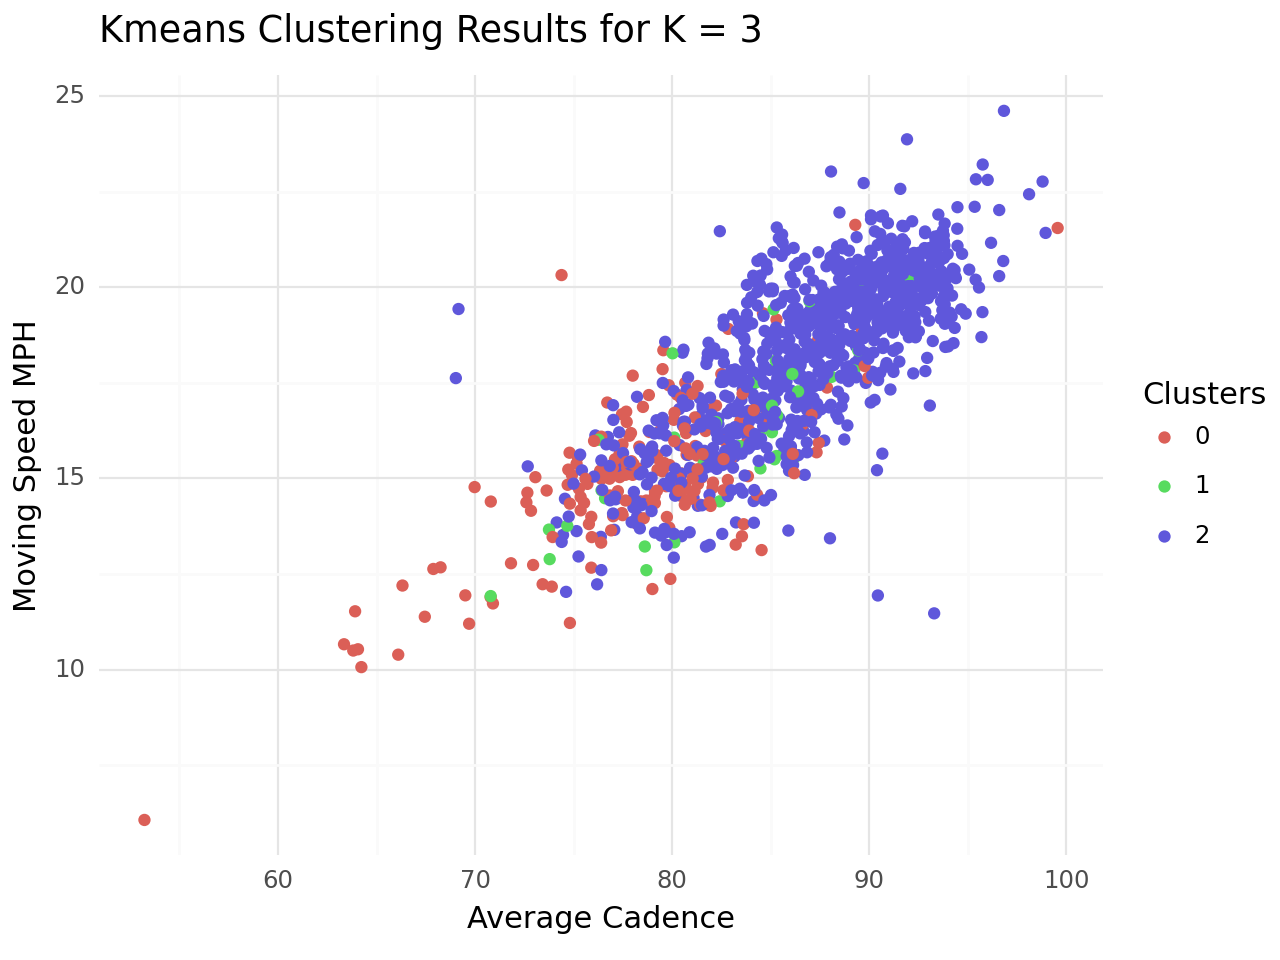

In [ ]:
print(ggplot(clust_X, aes(x = "Average Cadence", y = "Moving Speed MPH", color = "factor(labels)" )) +
geom_point() + theme_minimal() +
labs(x = "Average Cadence", y = "Moving Speed MPH", title = "Kmeans Clustering Results for K = 3", color = "Clusters"))

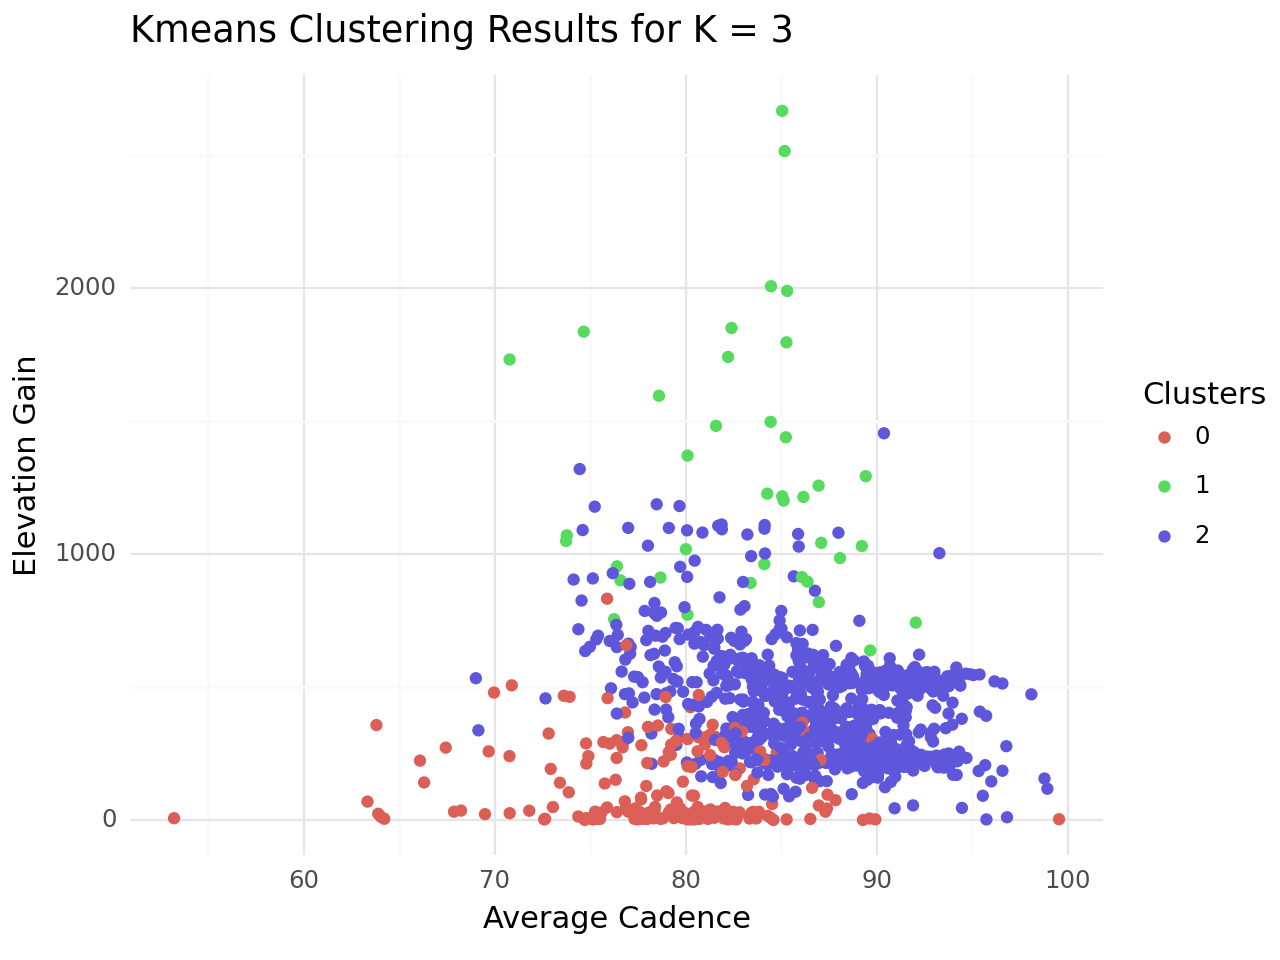

In [ ]:
print(ggplot(clust_X, aes(x = "Average Cadence", y = "Elevation Gain", color = "factor(labels)" )) +
geom_point() + theme_minimal() +
labs(x = "Average Cadence", y = "Elevation Gain", title = "Kmeans Clustering Results for K = 3", color = "Clusters"))

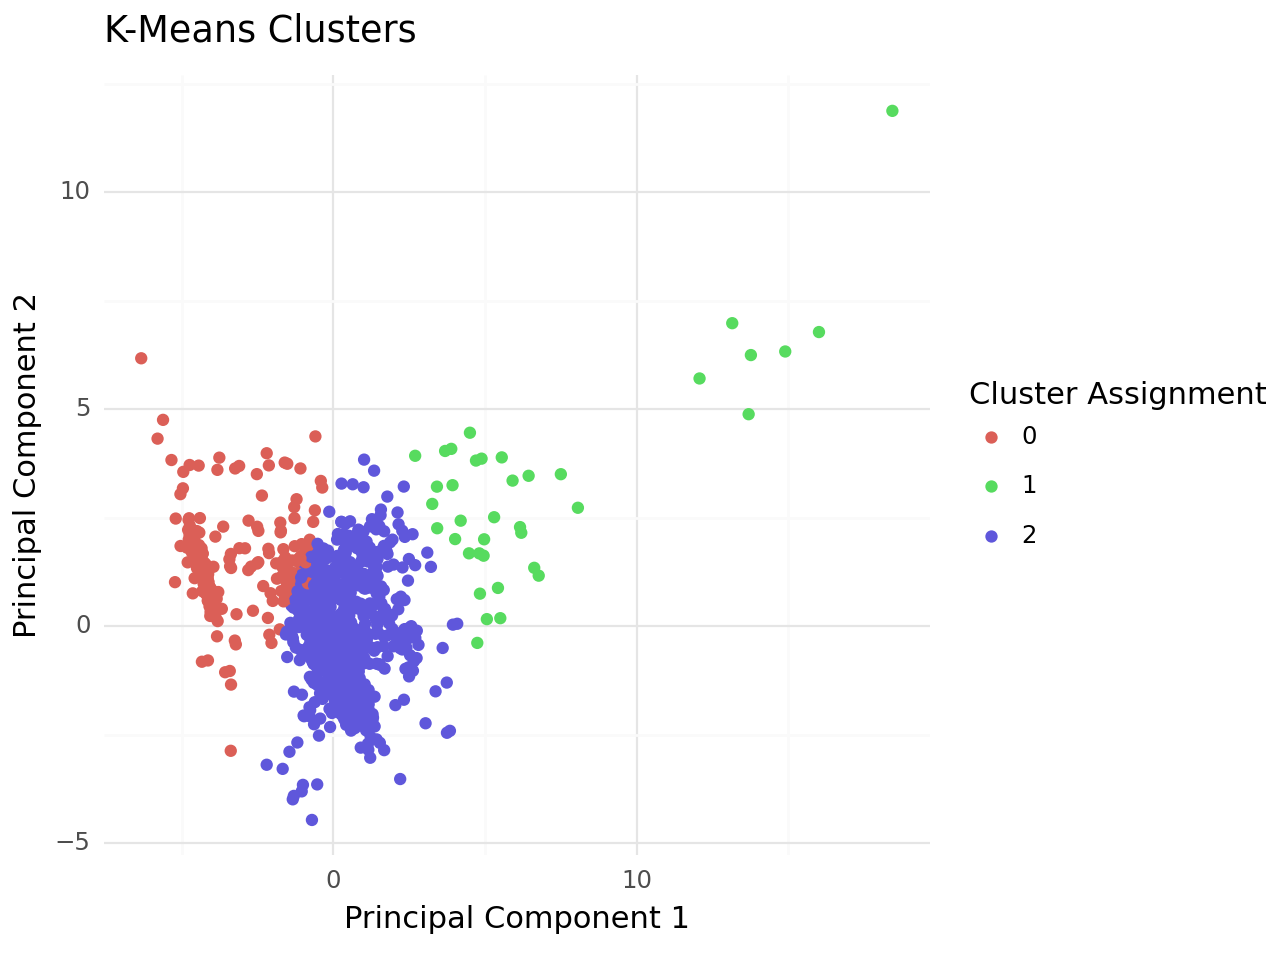

<Figure Size: (640 x 480)>

In [ ]:
clust_pca = PCA(n_components = 2)
clust_pipe_pca = Pipeline([
("z", z),
("pca", clust_pca)
])

clust_pipe_pca.fit(clust_X[cluster_predictors])

ride_data["clusters"] = labels
ride_data[["pc1", "pc2"]] = pd.DataFrame(clust_pipe_pca.transform(ride_data[cluster_predictors]))

(ggplot(ride_data, aes(x = "pc1", y = "pc2", color = "factor(clusters)")) +
geom_point() + theme_minimal() +
labs(x = "Principal Component 1", y = "Principal Component 2", title = "K-Means Clusters") +
scale_color_discrete(name = "Cluster Assignment"))

In [ ]:
cluster_summary = clust_X.groupby(labels).mean()

print(cluster_summary)

   Moving Speed MPH     Calories  Elapsed Time   Moving Time  Max Heart Rate  \
0         15.144342   286.073099   2628.255102   2304.260204      149.464286   
1         16.242891  2266.189289  16406.368421  13511.289474      177.605263   
2         18.412663  1010.668161   5507.443051   4987.178683      179.715778   

   Average Watts  Average Cadence  Elevation Gain   Max Grade   Distance  
0     105.336247        78.789783      128.514285   41.343579  15.550867  
1     156.343192        82.928739     1296.598424  787.317985  97.426842  
2     184.623279        87.147217      413.623420   45.018084  40.664713  
